In [1]:
#This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#to predict the closing stock price of a corporation(Apple Inc.). Use the last 60 days
#import the libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
#from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential 
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')


In [2]:
#Get the stock quote
df=pdr.get_data_yahoo('AAPL','2011-01-01','2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
#Show the Data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,11.533929,11.552857,11.475357,11.520000,9.876848,193508000
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.091495,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.144160,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.227142,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.218874,300428800
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2769, 6)

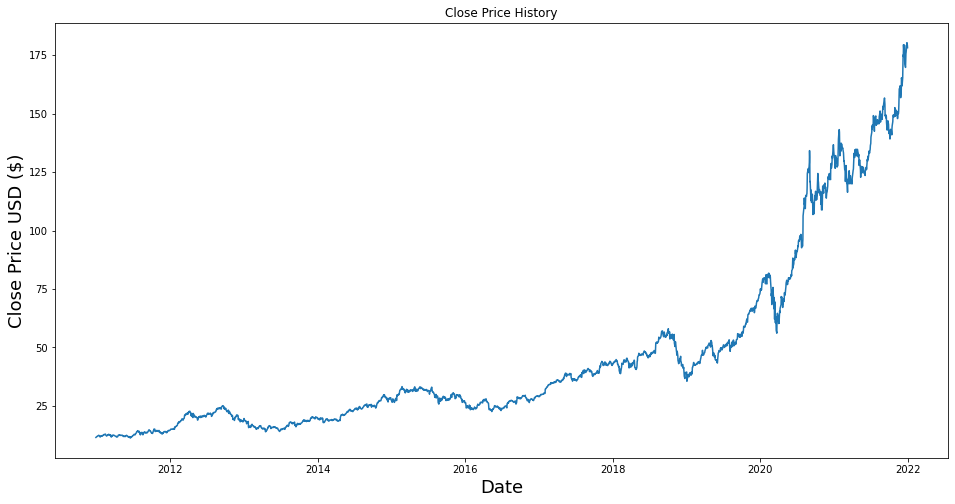

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the Close column
data = df[['Close']]
#Convert dataFrame to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len =int(0.8*len(dataset))
training_data_len

2215

In [7]:
#Scale the data(transform the data between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.00152939],
       [0.00301019],
       [0.00337353],
       ...,
       [0.9938486 ],
       [0.994381  ],
       [0.98740153]])

In [8]:
#Create the training data set 
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#train_data
#Split the data into x_train and y_train data set
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00152939, 0.00301019, 0.00337353, 0.00394598, 0.00388896,
       0.00439382, 0.00573098, 0.00555988, 0.00614712, 0.00641328,
       0.00700476, 0.00535074, 0.0049684 , 0.00366715, 0.00240815,
       0.00467478, 0.00550917, 0.00602672, 0.00589152, 0.00438959,
       0.00506979, 0.00627598, 0.006126  , 0.0059401 , 0.00658651,
       0.00772299, 0.0084243 , 0.00904958, 0.00828489, 0.00877286,
       0.00926505, 0.00941714, 0.01009946, 0.00907916, 0.00744415,
       0.00491981, 0.00576689, 0.00582181, 0.00693717, 0.00800394,
       0.00718009, 0.00777368, 0.00934532, 0.00943827, 0.00845811,
       0.0085426 , 0.00784762, 0.00662242, 0.00774622, 0.00807787,
       0.00636048, 0.00310313, 0.00408119, 0.00324255, 0.00506557,
       0.00546692, 0.00504233, 0.00626331, 0.00765116, 0.00741879])]
[0.0075286417207532375]



In [9]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [10]:
#Reshape the data(shape become 3 dimensional)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2155, 60, 1)

In [11]:
#Bulid the LSTM model
model=Sequential()
#add the layer to the model
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2155/2155 [==============================] - 34s 15ms/step - loss: 1.6993e-04


In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 2155 to 2769
test_data=scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#Reshape the data(shape become 3 dimensional)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#Get the models predicted price values
predictions =model.predict(x_test)
predictions =scaler.inverse_transform(predictions)

In [18]:
#Get the root mean squared error(RMSE)
rese= np.sqrt(np.mean(predictions - y_test)**2)
rese

3.6198112887165608

C:\Users\ali\AppData\Local\Temp/ipykernel_15804/2915072807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] =predictions


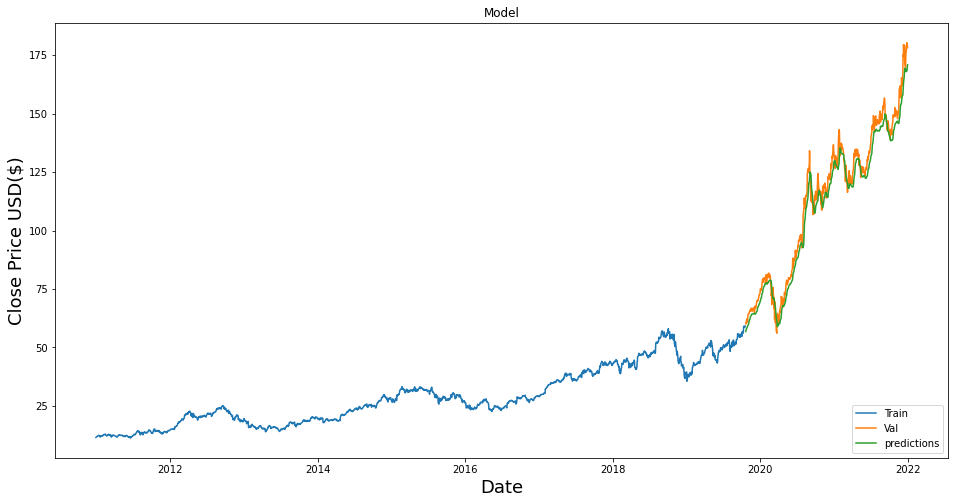

In [19]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] =predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-10-21,60.127499,56.791561
2019-10-22,59.990002,57.092834
2019-10-23,60.794998,57.380966
2019-10-24,60.895000,57.719467
2019-10-25,61.645000,58.056831
...,...,...
2021-12-23,176.279999,167.960739
2021-12-27,180.330002,168.248962
2021-12-28,179.289993,169.119843


In [21]:
#predicted the close price for this date 2022-01-01
#Get the qoute
apple_quote=pdr.get_data_yahoo('AAPL','2011-01-01','2021-12-31')
#Create a new dataframe
new_df=apple_quote[['Close']]
#Get last 60 day closing price values and convert the dataframe to an array
last_60_days= new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.fit_transform(last_60_days)
#Create empty list
X_test=[]
#Append past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test to numpy array
X_test=np.array(X_test)
#Reshape the data(shape become 3 dimensional)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price =model.predict(X_test)
#undo the scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[176.2068]]


In [22]:
#Get the real price for this date 2022-01-01
apple_quote2=pdr.get_data_yahoo('AAPL','2022-01-01','2022-01-01')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2021-12-31    177.570007
Name: Close, dtype: float64


In [23]:
model.save("Saved_LSTM_Model")

INFO:tensorflow:Assets written to: Saved_LSTM_Model\assets


INFO:tensorflow:Assets written to: Saved_LSTM_Model\assets
